In [3]:
%matplotlib inline

import os
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import ast
#Built-in module from FMA
import utils


In [4]:
df = pd.read_csv('tracks_supervised.csv', index_col='track_id')
df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  year_released genres_top genres_all  \
track_id                                                                        
2            0.159310  165.922  0.576661         2009.0    Hip-Hop       [21]   
3            0.461818  126.957  0.269240         2009.0    Hip-Hop       [21]   
5            0.124595  100.260  0.621661         2009.0    Hip-Hop       [21]   
10           0.032985  111.562  0.963590         2008.0        Pop       [10]   
134          0.525519  114.290  0.894072         2009.0    Hip-Hop       [21]   

          duration  
track_id            
2            168.0  
3            237.0  
5            206.0  
10           161.0  
134          207.0

In [5]:
### Add a new genre: Metal!
df['genres_top'][df.loc[:,'genres_all'].str.contains('31')] = 'Metal'
#metal_tracks.info()
df[df['genres_top'] == 'Metal'].head(10)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
256           0.430247      0.262050  0.972086          0.896693  0.407344   
257           0.357086      0.189345  0.939706          0.945661  0.146850   
258           0.061475      0.287633  0.938653          0.875300  0.116520   
1014          0.001059      0.109739  0.658233          0.916744  0.094158   
1015          0.122803      0.322933  0.962069          0.958391  0.130901   
1016          0.079623      0.073809  0.842903          0.965516  0.095671   
1017          0.108604      0.121971  0.768832          0.967197  0.100888   
1018          0.000887      0.251563  0.578091          0.912275  0.083493   
3727          0.295759      0.272827  0.554242          0.900505  0.169874   
6715          0.960105      0.473008  0.226052          0.000003  0.119505   

          speechiness    tempo   valence  year_released genres_top  \
track_id                                                             
256          0.151245  118.281  0.061796         2009.0      Metal   
257          0.064067   83.959  0.202260         2009.0      Metal   
258          0.090616  119.803  0.142596         2009.0      Metal   
1014         0.038857  167.380  0.321951         2009.0      Metal   
1015         0.052365  135.446  0.165824         2009.0      Metal   
1016         0.058472  173.212  0.107573         2009.0      Metal   
1017         0.066022   82.594  0.142250         2009.0      Metal   
1018         0.046008  167.155  0.068527         2009.0      Metal   
3727         0.056588  156.345  0.244544         2008.0      Metal   
6715         0.927098  195.042  0.530611            0.0      Metal   

                    genres_all  duration  
track_id                                  
256                   [12, 31]     202.0  
257                   [12, 31]     146.0  
258                   [12, 31]     384.0  
1014                  [12, 31]     219.0  
1015                  [12, 31]     240.0  
1016                  [12, 31]     355.0  
1017                  [12, 31]     316.0  
1018                  [12, 31]     386.0  
3727                  [12, 31]     175.0  
6715      [12, 45, 53, 90, 31]    1014.0

In [6]:
df.head()

acousticness  danceability    energy  instrumentalness  liveness  \
track_id                                                                     
2             0.416675      0.675894  0.634476          0.010628  0.177647   
3             0.374408      0.528643  0.817461          0.001851  0.105880   
5             0.043567      0.745566  0.701470          0.000697  0.373143   
10            0.951670      0.658179  0.924525          0.965427  0.115474   
134           0.452217      0.513238  0.560410          0.019443  0.096567   

          speechiness    tempo   valence  year_released genres_top genres_all  \
track_id                                                                        
2            0.159310  165.922  0.576661         2009.0    Hip-Hop       [21]   
3            0.461818  126.957  0.269240         2009.0    Hip-Hop       [21]   
5            0.124595  100.260  0.621661         2009.0    Hip-Hop       [21]   
10           0.032985  111.562  0.963590         2008.0        Pop       [10]   
134          0.525519  114.290  0.894072         2009.0    Hip-Hop       [21]   

          duration  
track_id            
2            168.0  
3            237.0  
5            206.0  
10           161.0  
134          207.0

In [7]:
### Normalize Tempo column

df['tempo'] /= np.max(np.abs(df['tempo']))
df['tempo'].head()

track_id
2      0.660854
3      0.505660
5      0.399328
10     0.444343
134    0.455208
Name: tempo, dtype: float64

In [8]:
### Isolate audio features into one dataframe
audio_cols = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence']
audio_features = df[audio_cols]

### Prelude: Definition of Features
Taken from Spotify's site: https://developer.spotify.com/web-api/get-audio-features/

- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **Energy** is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. The value here is normalized so the max value = 1
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

### Distribution of Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A3815A898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000020A38525908>]], dtype=object)

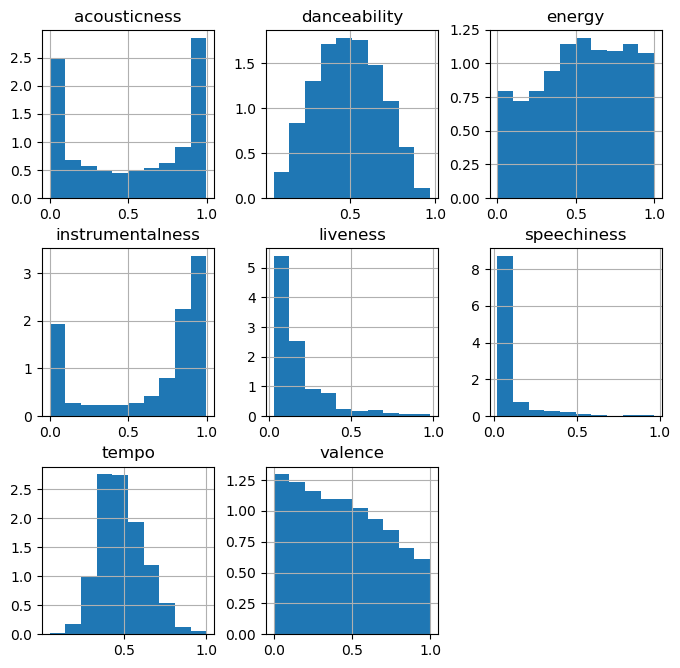

In [9]:
audio_features.hist(figsize=(8,8), normed=True)


### Quantifying Relationship Between Audio Features
For the sake of this analysis, let's assume that we have a null-hypothesis that states that each audio feature is independent. The alternative hypothesis is that for each audio feature, another audio feature is correlated in some way.

In [10]:
from scipy.stats import pearsonr
import pandas as pd
# Function taken from: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(audio_features)

acousticness danceability  energy instrumentalness liveness  \
acousticness                0            0       0                0        0   
danceability                0            0       0                0        0   
energy                      0            0       0           0.7823        0   
instrumentalness            0            0  0.7823                0        0   
liveness                    0            0       0                0        0   
speechiness                 0            0  0.3219                0        0   
tempo                       0            0       0           0.0084    0.386   
valence                     0            0       0                0   0.0404   

                 speechiness   tempo valence  
acousticness               0       0       0  
danceability               0       0       0  
energy                0.3219       0       0  
instrumentalness           0  0.0084       0  
liveness                   0   0.386  0.0404  
speechiness                0  0.0002       0  
tempo                 0.0002       0       0  
valence                    0       0       0

From the p-value matrix above, most of the audio features are related to one another. Out of 28 relationships (8 features * 7 other features)/2, the null-hypothesis can be accepted in 3 relationships if we set our p-value threshold > 0.05. These relationships are:

- energy & instrumentalness
- liveness & tempo
- tempo & energy

### Correlation Between Audio Features

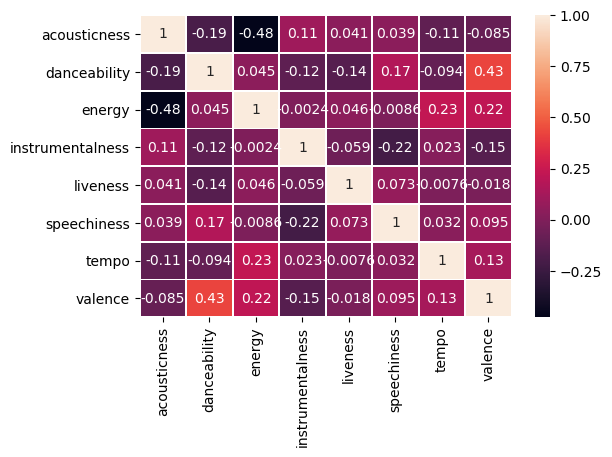

In [11]:
corr = audio_features.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)
#plt.figure(figsize=[15,15])

In [10]:
corr

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.163020 -0.482850          0.119864   
danceability         -0.163020      1.000000  0.022409         -0.117890   
energy               -0.482850      0.022409  1.000000          0.001444   
instrumentalness      0.119864     -0.117890  0.001444          1.000000   
liveness              0.028288     -0.144436  0.084721         -0.050614   
speechiness           0.058620      0.160353 -0.028793         -0.197073   
tempo                -0.112756     -0.091614  0.226855          0.016419   
valence              -0.083299      0.428585  0.215221         -0.137235   

                  liveness  speechiness     tempo   valence  
acousticness      0.028288     0.058620 -0.112756 -0.083299  
danceability     -0.144436     0.160353 -0.091614  0.428585  
energy            0.084721    -0.028793  0.226855  0.215221  
instrumentalness -0.050614    -0.197073  0.016419 -0.137235  
liveness          1.000000     0.092682 -0.009705 -0.005762  
speechiness       0.092682     1.000000  0.042741  0.085103  
tempo            -0.009705     0.042741  1.000000  0.153562  
valence          -0.005762     0.085103  0.153562  1.000000

#### Commentary
There's plenty of intuitive observations based on the correlations. 
- Acousticness and energy share the largest negative correlation (-0.48).
- Danceability and valence share the largest positive correlation (0.43)
- Energy and danceability are relatively neutral to each other (0.022)

### Plotting Relationship of Features By Genre

In [28]:
df.sort_values('genres_top', inplace=True)

In [48]:
n_genres = len(df['genres_top'].unique())

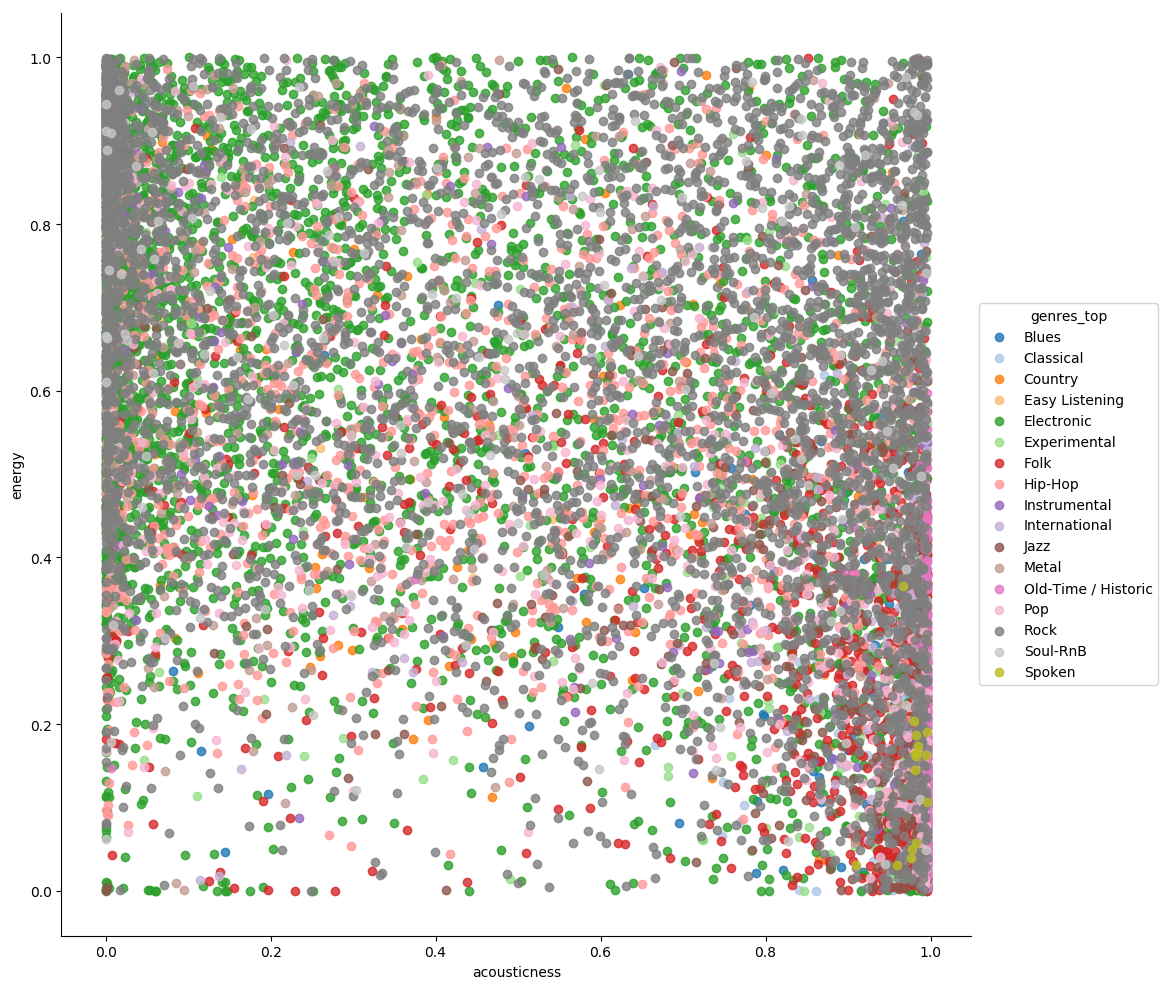

In [59]:
sns.lmplot(data=df, x="acousticness", y="energy", hue="genres_top", palette='tab20',
           fit_reg=False, legend=True, size=10)
#sns.set_palette('Set3', n_colors=n_genres)

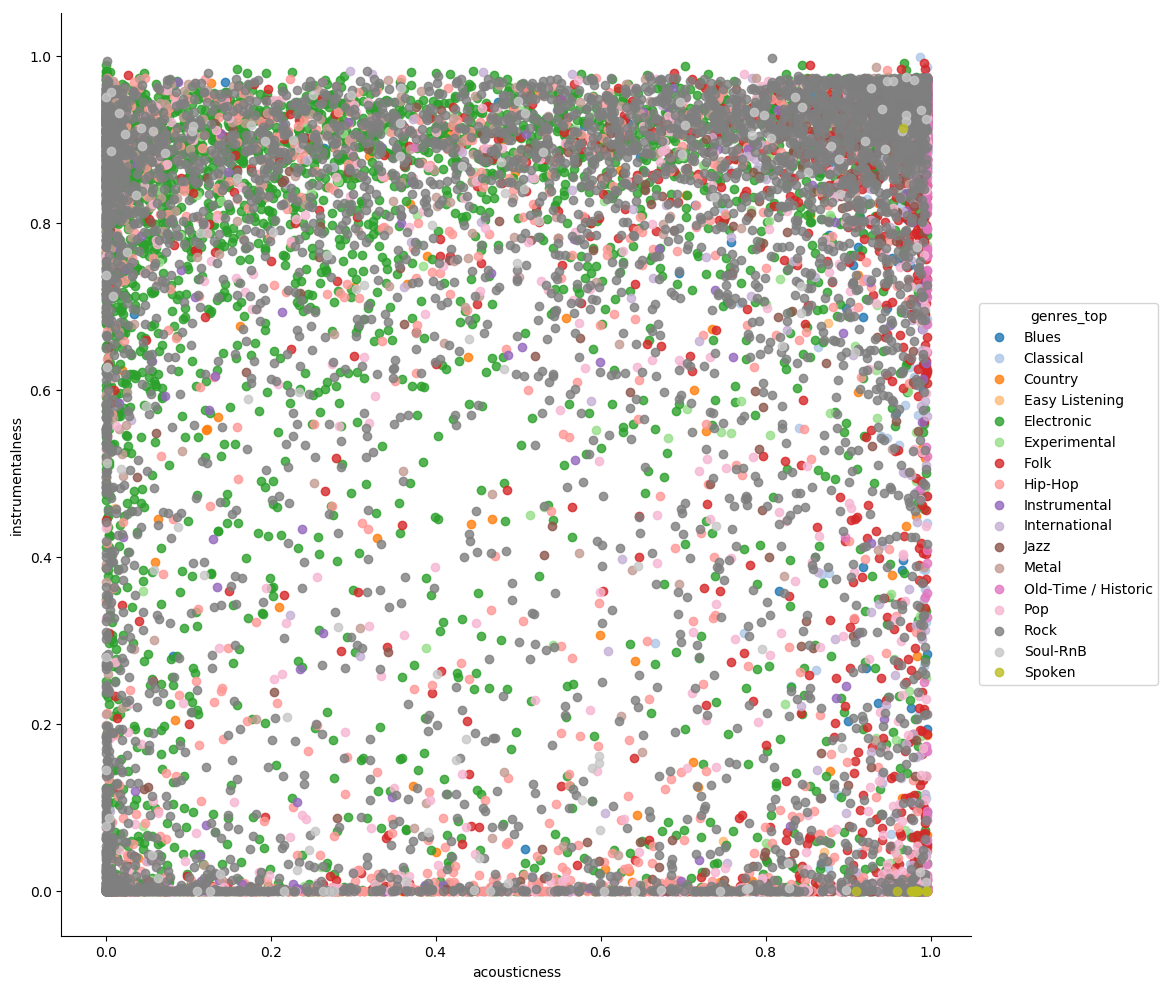

In [60]:
sns.lmplot(data=df, x="acousticness", y="instrumentalness", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10)


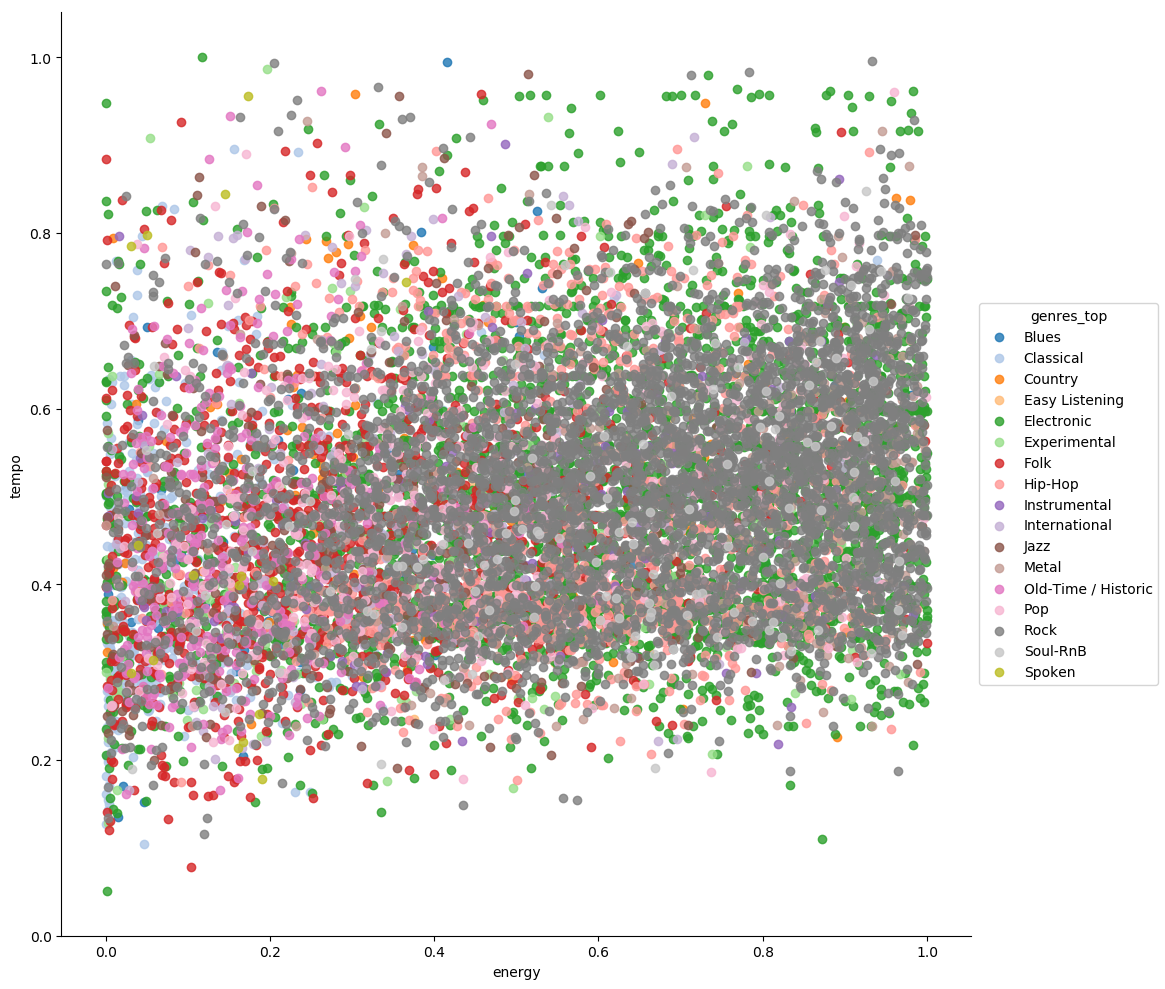

In [61]:
sns.lmplot(data=df, x="energy", y="tempo", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10)

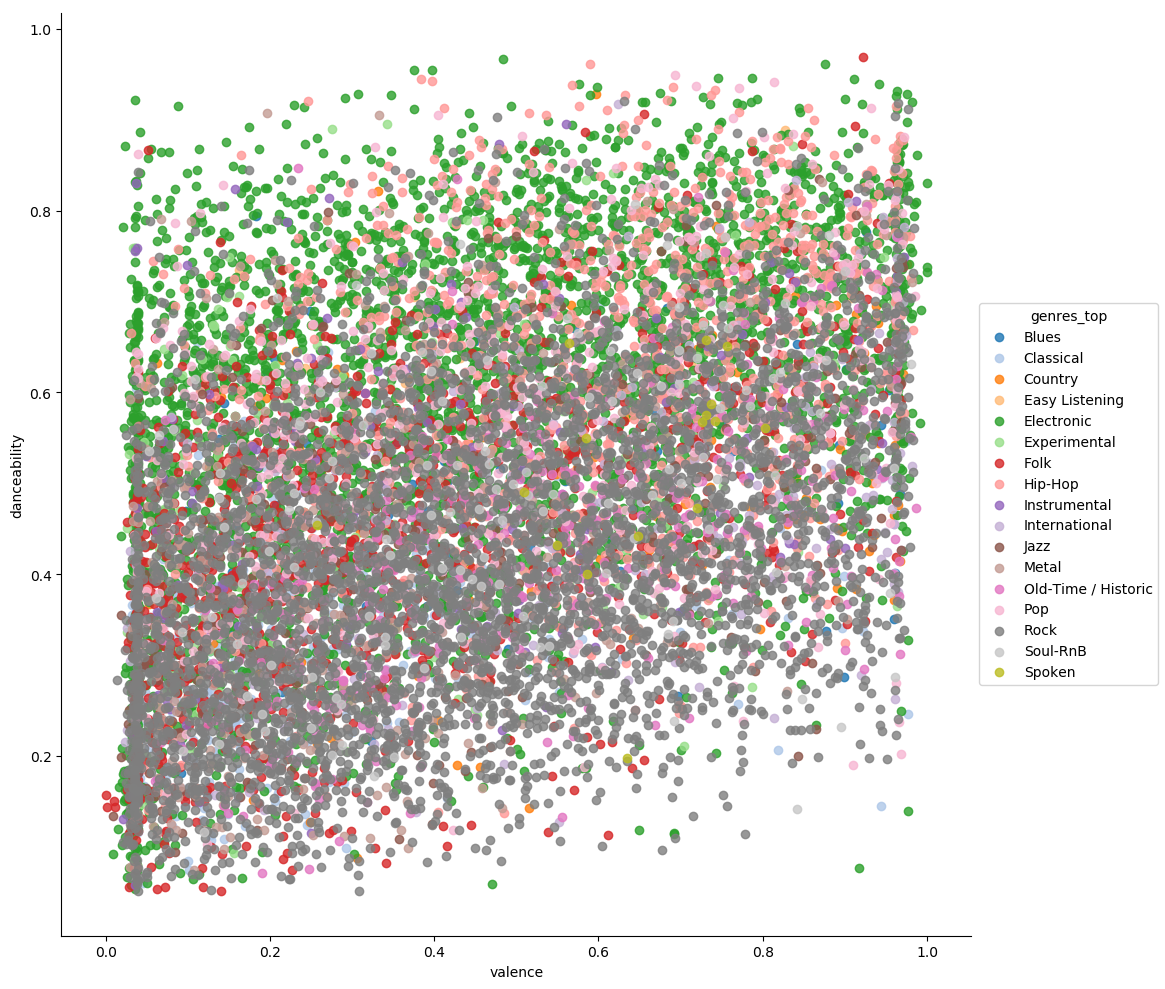

In [62]:
sns.lmplot(data=df, x="valence", y="danceability", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10)

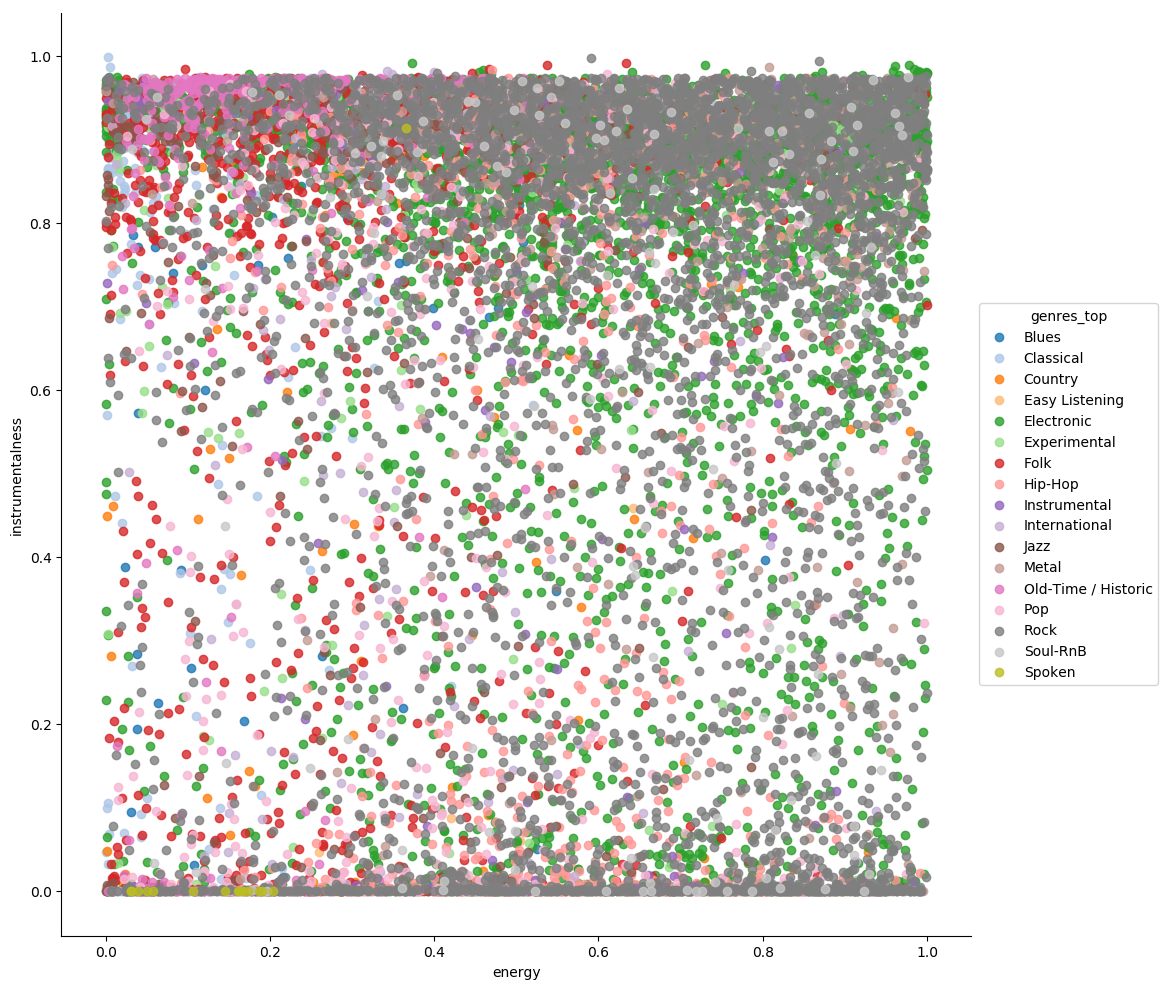

In [63]:
sns.lmplot(data=df, x="energy", y="instrumentalness", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10)

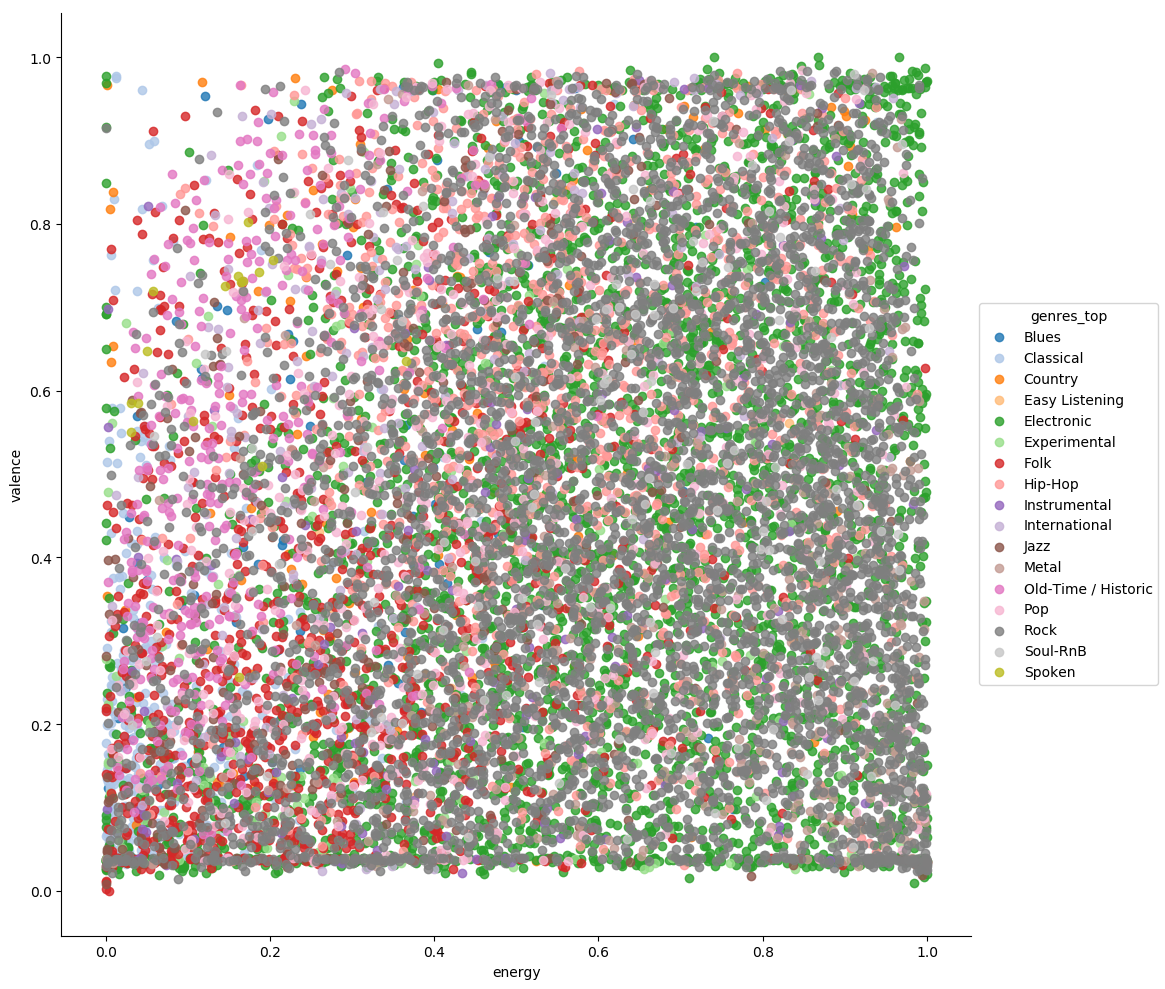

In [64]:
sns.lmplot(data=df, x="energy", y="valence", hue="genres_top", palette="tab20",
           fit_reg=False, legend=True, size=10)

#### Plotting each track is messy!
It would probably be better to group these features by the average of each genre. 

### Plotting Audio Features by Genre

Below are just some pairings of audio features plotted against each other by genre

In [65]:
genre_groupby = df.drop(['year_released', 'duration'], axis=1).groupby('genres_top').agg('mean')
genre_groupby
#genre_groupby.corr()

acousticness  danceability    energy  instrumentalness  \
genres_top                                                                    
Blues                    0.825582      0.475235  0.307554          0.534776   
Classical                0.976855      0.316005  0.087507          0.752226   
Country                  0.605171      0.486435  0.428365          0.480032   
Easy Listening           0.447315      0.654174  0.512658          0.202221   
Electronic               0.349586      0.583794  0.606626          0.719687   
Experimental             0.750516      0.457920  0.357308          0.701376   
Folk                     0.811610      0.432719  0.301710          0.652968   
Hip-Hop                  0.408688      0.625528  0.567852          0.381035   
Instrumental             0.601096      0.486562  0.480029          0.636374   
International            0.840727      0.478120  0.387054          0.555916   
Jazz                     0.786628      0.427067  0.354218          0.682589   
Metal                    0.295386      0.413649  0.692017          0.675699   
Old-Time / Historic      0.989626      0.430905  0.173587          0.769823   
Pop                      0.555114      0.562213  0.468376          0.459520   
Rock                     0.514225      0.411061  0.627430          0.638264   
Soul-RnB                 0.466298      0.481570  0.609554          0.557209   
Spoken                   0.977113      0.516261  0.139786          0.057097   

                     liveness  speechiness     tempo   valence  
genres_top                                                      
Blues                0.170920     0.080796  0.448852  0.471891  
Classical            0.222520     0.051567  0.410877  0.240054  
Country              0.157157     0.097682  0.515850  0.533178  
Easy Listening       0.166075     0.041499  0.452140  0.541020  
Electronic           0.171622     0.114541  0.495309  0.436835  
Experimental         0.166535     0.112360  0.437583  0.308708  
Folk                 0.158227     0.060263  0.457710  0.345936  
Hip-Hop              0.188429     0.241662  0.473654  0.589393  
Instrumental         0.187647     0.080690  0.479060  0.374722  
International        0.278043     0.129717  0.499477  0.612296  
Jazz                 0.196874     0.089364  0.462083  0.393708  
Metal                0.181322     0.079325  0.498622  0.314324  
Old-Time / Historic  0.398610     0.145467  0.453031  0.529215  
Pop                  0.161839     0.068640  0.487397  0.479961  
Rock                 0.187917     0.067366  0.510774  0.441957  
Soul-RnB             0.208805     0.072470  0.485708  0.487893  
Spoken               0.219796     0.706045  0.479397  0.642547

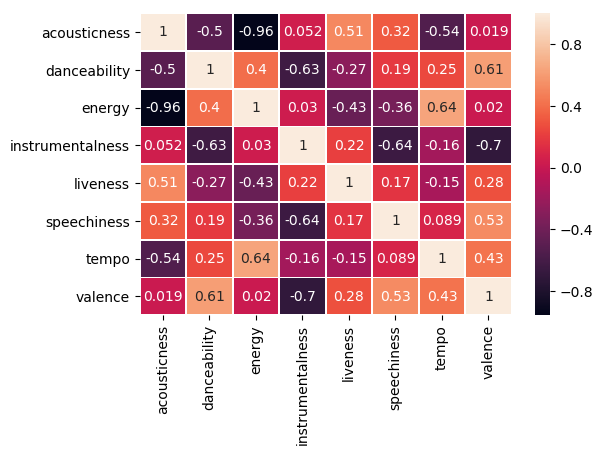

In [74]:
corr = genre_groupby.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True,
           linewidth=0.5)

Text(0.5,1,'acousticness vs. energy')

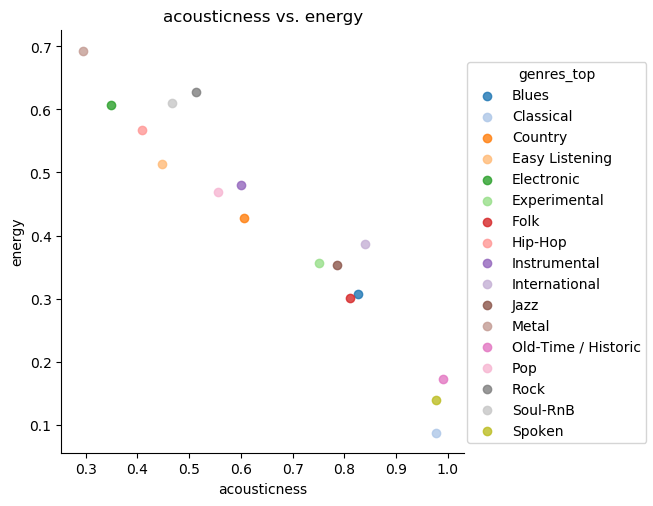

In [67]:
#High negative R

sns.lmplot(data=genre_groupby.reset_index(), x="acousticness", y="energy", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. energy')


- Hip-hop is the most energetic and also the least acoustic
- On the opposite end are Pop, Spoken Word, and Soul-RnB
- Most genres are clustered between energy levels 0.3-0.6 and acousticness levels 0.4-0.9
- Some genres are very close to each other. Folk and Blues are nearly identical in acousticness and energy. 

Text(0.5,1,'instrumentalness vs. valence')

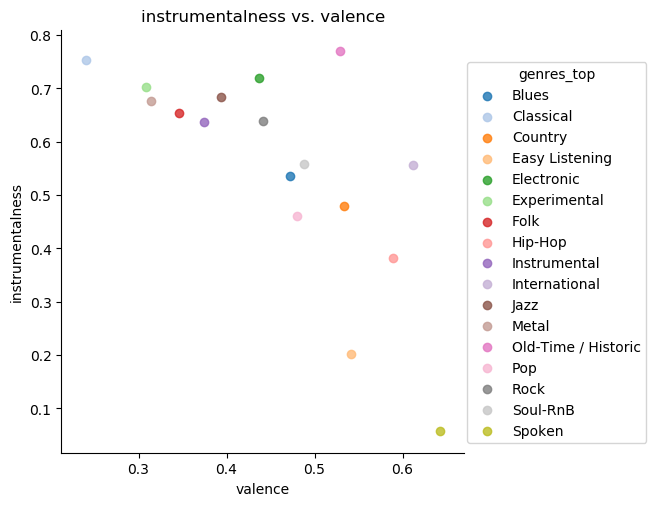

In [80]:
#High negative R

sns.lmplot(data=genre_groupby.reset_index(), x="valence", y="instrumentalness", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('instrumentalness vs. valence')


Text(0.5,1,'valence vs. danceability')

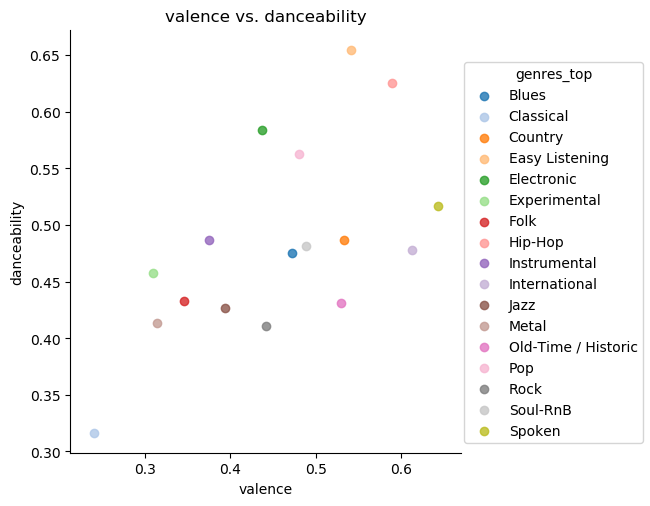

In [68]:
#High positive R


sns.lmplot(data=genre_groupby.reset_index(), x="valence", y="danceability", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('valence vs. danceability')

Text(0.5,1,'tempo vs. energy')

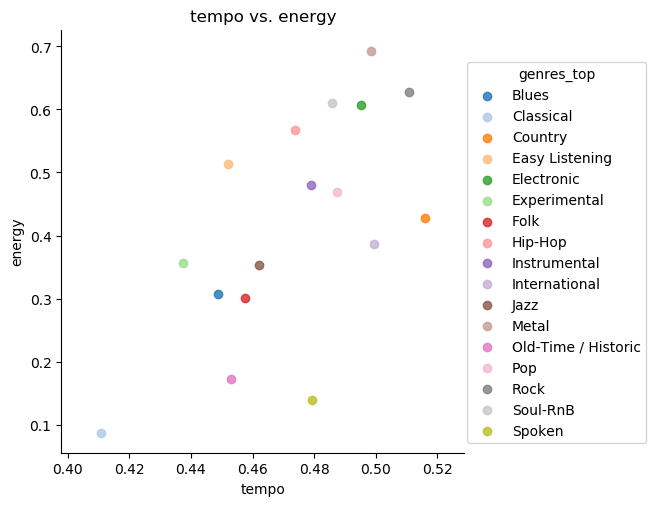

In [78]:
# High Positive R

sns.lmplot(data=genre_groupby.reset_index(), x="tempo", y="energy", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('tempo vs. energy')

Text(0.5,1,'acousticness vs. instrumentalness')

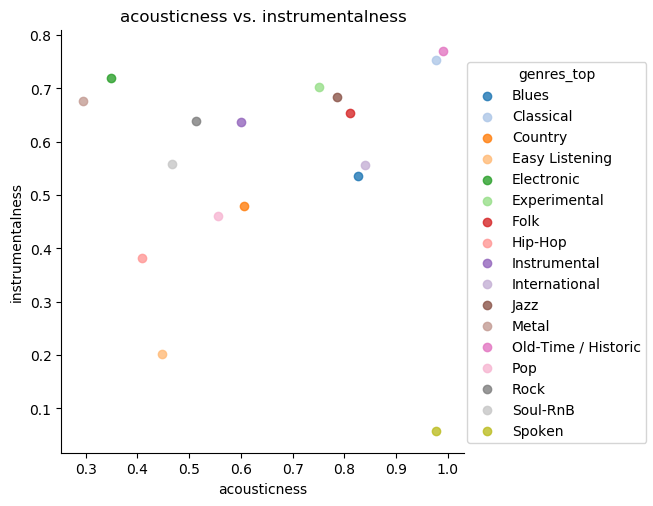

In [77]:
# Neutral R
sns.lmplot(data=genre_groupby.reset_index(), x="acousticness", y="instrumentalness", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. instrumentalness')

Text(0.5,1,'acousticness vs. danceability')

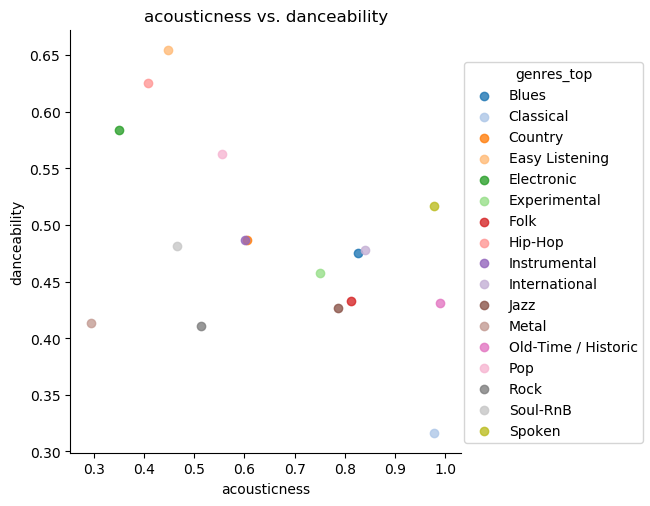

In [70]:
# ~Neutral R
sns.lmplot(data=genre_groupby.reset_index(), x="acousticness", y="danceability", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. danceability')

Text(0.5,1,'acousticness vs. instrumentalness')

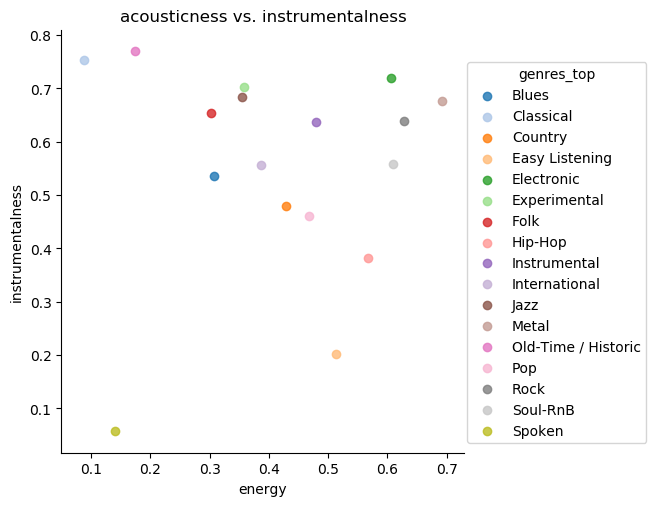

In [76]:
# Neutral R
sns.lmplot(data=genre_groupby.reset_index(), x="energy", y="instrumentalness", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('acousticness vs. instrumentalness')

Text(0.5,1,'tempo vs. energy')

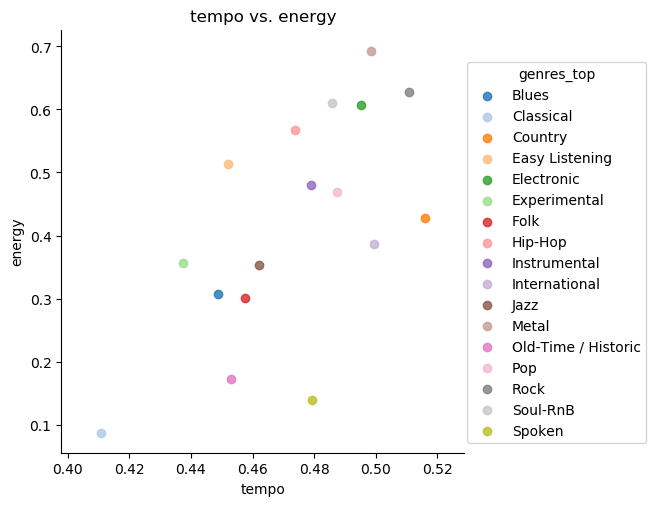

In [75]:
# High Positive R

sns.lmplot(data=genre_groupby.reset_index(), x="tempo", y="energy", hue='genres_top', palette="tab20", fit_reg=False)
plt.title('tempo vs. energy')

In [72]:
#